In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
f=open("kidnapmap.log", "r")
kidnap_log = f.read()
f.close()

f=open("revo.log", "r")
revo_log = f.read()
f.close()

In [3]:
final_cost_list = re.findall("final cost is : (\d+\.\d+)", kidnap_log,re.IGNORECASE)
final_cost_list = [float(i) for i in final_cost_list]

revo_cost_list = re.findall("final cost is : (\d+\.\d+)", revo_log,re.IGNORECASE)
revo_cost_list = [float(i) for i in revo_cost_list]

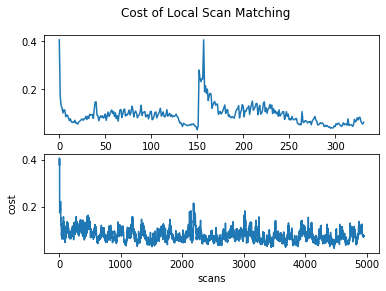

In [4]:
fig, axs = plt.subplots(2)
fig.suptitle('Cost of Local Scan Matching')


axs[0].plot(final_cost_list)

# plt.title('Cost of local scan matching, te Kindapped robot event happens around 150 th scan')

# plt.show()

axs[1].plot(revo_cost_list)
plt.xlabel('scans')
plt.ylabel('cost')
# plt.title('Cost of local scan matching, no Kindapped robot happens')
plt.savefig("Local_scan_cost.png")
plt.show()



In [5]:

def exponential_filter(final_cost_list):
    alpha_fast = 0.2
    alpha_slow = 0.05
    cost_fast = 0
    cost_slow = 0
    weight_fast = 0
    weight_slow = 0
    cost_fast_list=[]
    cost_slow_list=[]
    weight_fast_list=[]
    weight_slow_list=[]

    for cost in final_cost_list:
        cost_fast = cost_fast+alpha_fast*(cost-cost_fast)
        cost_fast_list.append(cost_fast)
        
        cost_slow = cost_slow+alpha_slow*(cost-cost_slow)
        cost_slow_list.append(cost_slow)
        
        weight = 1/cost
        
        weight_fast = weight_fast+alpha_fast*(weight-weight_fast)
        weight_fast_list.append(weight_fast)
        
        weight_slow = weight_slow+alpha_slow*(weight-weight_slow)
        weight_slow_list.append(weight_slow)
    return (cost_fast_list,cost_slow_list,weight_fast_list,weight_slow_list)
    

In [6]:
c_f,c_s,w_f,w_s = exponential_filter(final_cost_list)
weight_list = [1/i for i in final_cost_list]

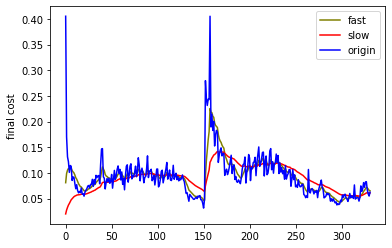

In [7]:
plt.plot(c_f,color='olive')
plt.plot(c_s,color='red')
plt.plot(final_cost_list,color='blue')
plt.ylabel('final cost')
plt.legend(['fast','slow','origin'])
plt.show()

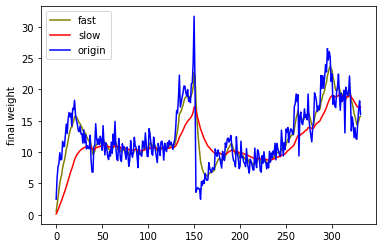

In [8]:
plt.plot(w_f,color='olive')
plt.plot(w_s,color='red')
plt.plot(weight_list,color='blue')
plt.ylabel('final weight')
plt.legend(['fast','slow','origin'])
plt.show()

In [9]:
from scipy import zeros, signal, random

def filter_sbs():
    data = random.random(2000)
    b = signal.firwin(150, 0.004)
    z = signal.lfilter_zi(b, 1)
    result = zeros(data.size)
    for i, x in enumerate(data):
        result[i], z = signal.lfilter(b, 1, [x], zi=z)
    return result

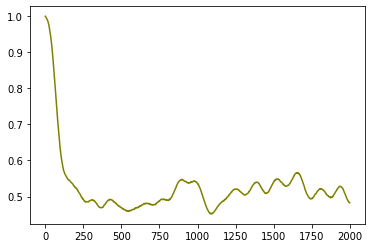

In [10]:
result = filter_sbs()
plt.plot(result,color='olive')
plt.show()

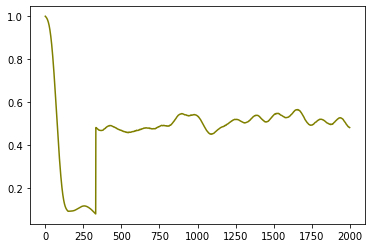

In [11]:
b = signal.firwin(150, 0.004)
z = signal.lfilter_zi(b, 1)
for i, x in enumerate(final_cost_list):
    result[i], z = signal.lfilter(b, 1, [x], zi=z)
plt.plot(result,color='olive')
plt.show()

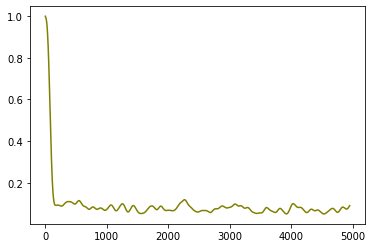

In [12]:
result = zeros(len(revo_cost_list))

b = signal.firwin(150, 0.004)
z = signal.lfilter_zi(b, 1)
for i, x in enumerate(revo_cost_list):
    result[i], z = signal.lfilter(b, 1, [x], zi=z)
plt.plot(result,color='olive')
plt.show()

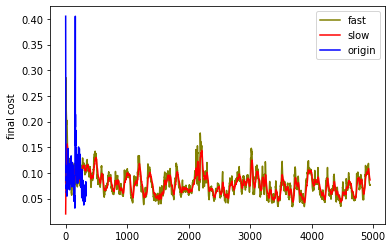

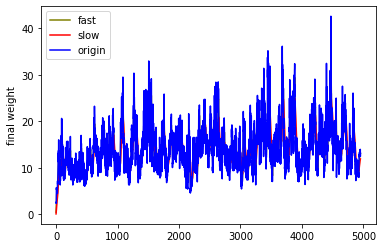

In [13]:
c_f,c_s,w_f,w_s = exponential_filter(revo_cost_list)
weight_list = [1/i for i in revo_cost_list]

plt.plot(c_f,color='olive')
plt.plot(c_s,color='red')
plt.plot(final_cost_list,color='blue')
plt.ylabel('final cost')
plt.legend(['fast','slow','origin'])
plt.show()


plt.plot(w_f,color='olive')
plt.plot(w_s,color='red')
plt.plot(weight_list,color='blue')
plt.ylabel('final weight')
plt.legend(['fast','slow','origin'])
plt.show()

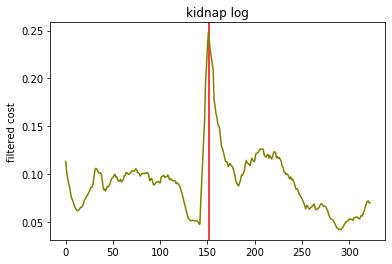

kidnap happed at : 152 th scan


In [14]:
def average_filter(input_list):
    return (sum(input_list)/(len(input_list)))

filter_size = 10
kidnap_trigger = 3
kidnaped_index =[]
filter_input_list = []
filter_output_list = []
for i,item in enumerate(final_cost_list):
    filter_input_list.append(item)
    if (len(filter_input_list) < filter_size):
        continue
    else:
        filter_input_list.pop(0)
        filter_out = average_filter(filter_input_list)
        filter_output_list.append(filter_out)
        if(item> kidnap_trigger*filter_out):
            kidnaped_index.append(i)
            
        
plt.axvline(x=kidnaped_index[0],color='red')
plt.plot(filter_output_list,color='olive')
plt.ylabel('filtered cost')
plt.title('kidnap log')
plt.savefig('averge_filter_detection.png')
plt.show()
print("kidnap happed at :", kidnaped_index[0],"th scan")

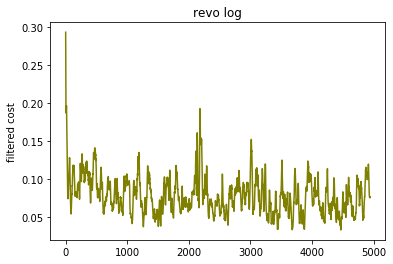

kidnap happed at indices: []


In [15]:
filter_size = 10
kidnap_trigger = 2
kidnaped_index =[]
filter_input_list = []
filter_output_list = []
for i,item in enumerate(revo_cost_list):
    filter_input_list.append(item)
    if (len(filter_input_list) < filter_size):
        continue
    else:
        filter_input_list.pop(0)
        filter_out = average_filter(filter_input_list)
        filter_output_list.append(filter_out)
        if(item> kidnap_trigger*filter_out):
            kidnaped_index.append(i)
            
        
plt.plot(filter_output_list,color='olive')
plt.ylabel('filtered cost')
plt.title('revo log')
plt.show()
print("kidnap happed at indices:", kidnaped_index)

In [16]:
kidnaped_index

[]